### Importing Data

In [32]:
dataFilePath = "dataset/sample2.md"

dataFile = open(dataFilePath)

### Parameters

In [33]:
elementCount = 60

## Converting Raw Data to Array

In [34]:
include_Product_Name_in_Dataset = 1

dictionary = {}

ingdList = []

buf = []
for line in dataFile.readlines():
    if(len(line) > 2):
        ## Check if new ingridient has started
        if (line[1] == "." or line[2] == "."): # or line[3] == "."):
            # store product name
            # words = line.split(' ')
            # words 


            # store ingridients from buf to list
            # ingdList.append(buf)
            # buf = []
            # if(len(buf) > 0):
            if(buf != []):
                ingdList.append(buf)
                buf = []
        else:
            spaceCount = line.count(' ')
            newLineCount = line.count('\n')

            # check if it has other character than space and new line
            if (spaceCount + newLineCount != len(line)):
              if(line[0] == '-' or line[0] == '.'):
                line = line[1:]
                while(line[0] == ' '):
                  line = line[1:]
                while(line[-1] == '\n'):
                  line = line[0:-1]
                buf.append(line)


print(ingdList)

[['Water, Ammonium Lauryl Sulfate, Cocamidopropyl Betaine, Sodium Cocoyl Glutamate, Glycerin, Sodium Lauroyl Sarcosinate, Glycol Distearate, Decyl Glucoside, PEG-150 Distearate, Sodium Lauryl Glucose Carboxylate (and) Lauryl Glucoside, Fragrance, Phenoxyethanol, Sodium Benzoate, Azadirachta Indica (Neem) Leaf Extract, Melia Azadirachta (Neem) Leaf Extract, Sodium Citrate, Citric Acid, Butylene Glycol (and) Boswellia Serrata Gum, Tocopheryl Acetate, CI 19140, CI 42090.'], ['Turmeric Extract, Sandalwood Oil, Water, Stearic Acid, Sorbitol, Sodium Hydroxide, Methyl Paraben, Propyl Paraben.'], ['Coconut Oil, Dugdh (Lactus), Manjistha (Rubia Cordifolia), Nimba Kamla (Citrus Limonum), Badam Tail (Prunus Amygdalus Oil), Cream Base Q.S.'], ['Water, Phenylbenzimidazole Sulfonic Acid, Oxybenzone, Octyl Methoxy Cinnamate, Cyclopentasiloxane, Acrylates/C10-30 Alkyl Acrylate Crosspolymer, Triethanolamine, Glycerin, Phenoxyethanol, Polysorbate 20, Methyl Paraben, Propyl Paraben, Fragrance, Carbomer, 

### Remove brackets and spaces

In [35]:
### Remove brackets and spaces in ingridients
for indx, ingdOf1 in enumerate(ingdList):
    ingds = ingdOf1[0].split(",")
    for i, ingd in enumerate(ingds):
        if(ingd.__contains__('(')):
            ingds[i] = ingd[0:ingd.find('(')]
        while(ingds[i][-1] == ' '):
            ingds[i] = ingds[i][0:-1]
        while(ingds[i][0] == ' '):
            ingds[i] = ingds[i][1:]
    ingdList[indx] = ingds
        # ingds[i] = ingd.replace('(', '')
        # ingds[i] = ingd.replace(')', '')
        # ingd = ingd.replace(' ', '')
    

In [36]:
print(ingdList)

[['Water', 'Ammonium Lauryl Sulfate', 'Cocamidopropyl Betaine', 'Sodium Cocoyl Glutamate', 'Glycerin', 'Sodium Lauroyl Sarcosinate', 'Glycol Distearate', 'Decyl Glucoside', 'PEG-150 Distearate', 'Sodium Lauryl Glucose Carboxylate', 'Fragrance', 'Phenoxyethanol', 'Sodium Benzoate', 'Azadirachta Indica', 'Melia Azadirachta', 'Sodium Citrate', 'Citric Acid', 'Butylene Glycol', 'Tocopheryl Acetate', 'CI 19140', 'CI 42090.'], ['Turmeric Extract', 'Sandalwood Oil', 'Water', 'Stearic Acid', 'Sorbitol', 'Sodium Hydroxide', 'Methyl Paraben', 'Propyl Paraben.'], ['Coconut Oil', 'Dugdh', 'Manjistha', 'Nimba Kamla', 'Badam Tail', 'Cream Base Q.S.'], ['Water', 'Phenylbenzimidazole Sulfonic Acid', 'Oxybenzone', 'Octyl Methoxy Cinnamate', 'Cyclopentasiloxane', 'Acrylates/C10-30 Alkyl Acrylate Crosspolymer', 'Triethanolamine', 'Glycerin', 'Phenoxyethanol', 'Polysorbate 20', 'Methyl Paraben', 'Propyl Paraben', 'Fragrance', 'Carbomer', 'Disodium EDTA', 'Vitamin E.'], ['Methi Seed Extract', 'Bhringraj Ex

In [37]:
def toLetters(input):
    valids = []
    for character in input:
        if character.isalpha():
            valids.append(character)
    return ''.join(valids)

def getWordComponents(inpList):
    subIng = []
    for subindx, ingd in enumerate(inpList):
        sub = ingd.split(' ')   # ['Milk', 'Fat']
        for x in sub:
            converted = toLetters(x.lower())
            if(len(converted) > 0):
                subIng.append(converted)
    return subIng


## Separating ingridient by space and to lower

In [38]:
seprdIngdList = []
### Split ingridients by space also
for indx, ingdOf1 in enumerate(ingdList):
    seprdIngdList.append(getWordComponents(ingdOf1))

In [39]:
seprdIngdList

[['water',
  'ammonium',
  'lauryl',
  'sulfate',
  'cocamidopropyl',
  'betaine',
  'sodium',
  'cocoyl',
  'glutamate',
  'glycerin',
  'sodium',
  'lauroyl',
  'sarcosinate',
  'glycol',
  'distearate',
  'decyl',
  'glucoside',
  'peg',
  'distearate',
  'sodium',
  'lauryl',
  'glucose',
  'carboxylate',
  'fragrance',
  'phenoxyethanol',
  'sodium',
  'benzoate',
  'azadirachta',
  'indica',
  'melia',
  'azadirachta',
  'sodium',
  'citrate',
  'citric',
  'acid',
  'butylene',
  'glycol',
  'tocopheryl',
  'acetate',
  'ci',
  'ci'],
 ['turmeric',
  'extract',
  'sandalwood',
  'oil',
  'water',
  'stearic',
  'acid',
  'sorbitol',
  'sodium',
  'hydroxide',
  'methyl',
  'paraben',
  'propyl',
  'paraben'],
 ['coconut',
  'oil',
  'dugdh',
  'manjistha',
  'nimba',
  'kamla',
  'badam',
  'tail',
  'cream',
  'base',
  'qs'],
 ['water',
  'phenylbenzimidazole',
  'sulfonic',
  'acid',
  'oxybenzone',
  'octyl',
  'methoxy',
  'cinnamate',
  'cyclopentasiloxane',
  'acrylatesc'

## Sort feature by Occurence

In [40]:
occurences = {}
for indx, ingdOf1 in enumerate(seprdIngdList):
    for ingd in ingdOf1:
        if(occurences.__contains__(ingd)):
            occurences[ingd] += 1
        else:
            occurences[ingd] = 1
        
occurences

{'water': 49,
 'ammonium': 7,
 'lauryl': 25,
 'sulfate': 12,
 'cocamidopropyl': 9,
 'betaine': 11,
 'sodium': 93,
 'cocoyl': 9,
 'glutamate': 10,
 'glycerin': 33,
 'lauroyl': 6,
 'sarcosinate': 5,
 'glycol': 18,
 'distearate': 8,
 'decyl': 10,
 'glucoside': 18,
 'peg': 7,
 'glucose': 3,
 'carboxylate': 3,
 'fragrance': 29,
 'phenoxyethanol': 22,
 'benzoate': 18,
 'azadirachta': 6,
 'indica': 4,
 'melia': 2,
 'citrate': 2,
 'citric': 14,
 'acid': 30,
 'butylene': 3,
 'tocopheryl': 10,
 'acetate': 12,
 'ci': 20,
 'turmeric': 22,
 'extract': 81,
 'sandalwood': 21,
 'oil': 98,
 'stearic': 7,
 'sorbitol': 3,
 'hydroxide': 13,
 'methyl': 7,
 'paraben': 13,
 'propyl': 6,
 'coconut': 5,
 'dugdh': 1,
 'manjistha': 4,
 'nimba': 1,
 'kamla': 1,
 'badam': 3,
 'tail': 1,
 'cream': 5,
 'base': 15,
 'qs': 17,
 'phenylbenzimidazole': 4,
 'sulfonic': 4,
 'oxybenzone': 1,
 'octyl': 4,
 'methoxy': 4,
 'cinnamate': 4,
 'cyclopentasiloxane': 8,
 'acrylatesc': 5,
 'alkyl': 5,
 'acrylate': 5,
 'crosspolymer'

In [41]:
len(occurences.keys())

583

In [42]:
# sort dictionary by value in descending order
sorted_occurences = {k: v for k, v in sorted(occurences.items(), key=lambda item: item[1], reverse=True)}

In [43]:
(sorted_occurences)

{'oil': 98,
 'sodium': 93,
 'extract': 81,
 'water': 49,
 'glycerin': 33,
 'powder': 33,
 'and': 31,
 'acid': 30,
 'fragrance': 29,
 'aloe': 26,
 'lauryl': 25,
 'vera': 25,
 'phenoxyethanol': 22,
 'turmeric': 22,
 'sandalwood': 21,
 'ci': 20,
 'vitamin': 19,
 'methylparaben': 19,
 'glycol': 18,
 'glucoside': 18,
 'benzoate': 18,
 'e': 18,
 'propylparaben': 18,
 'qs': 17,
 'potassium': 16,
 'base': 15,
 'sorbate': 15,
 'alcohol': 15,
 'citric': 14,
 'saffron': 14,
 'glyceryl': 14,
 'hydroxide': 13,
 'paraben': 13,
 'disodium': 13,
 'almond': 13,
 'of': 13,
 'neem': 13,
 'sulfate': 12,
 'acetate': 12,
 'purified': 12,
 'aqua': 12,
 'butter': 12,
 'rose': 12,
 'gum': 12,
 'betaine': 11,
 'edta': 11,
 'seed': 11,
 'cetyl': 11,
 'dimethicone': 11,
 'glutamate': 10,
 'decyl': 10,
 'tocopheryl': 10,
 'triethanolamine': 10,
 'cl': 10,
 'titanium': 10,
 'dioxide': 10,
 'root': 10,
 'stearate': 10,
 'orange': 10,
 'honey': 10,
 'cocamidopropyl': 9,
 'cocoyl': 9,
 'carbomer': 9,
 'oxide': 9,
 'xa

In [44]:
# get top "#elementCount" ingridients
topElements = list(sorted_occurences.keys())[0:elementCount]
print(topElements)

['oil', 'sodium', 'extract', 'water', 'glycerin', 'powder', 'and', 'acid', 'fragrance', 'aloe', 'lauryl', 'vera', 'phenoxyethanol', 'turmeric', 'sandalwood', 'ci', 'vitamin', 'methylparaben', 'glycol', 'glucoside', 'benzoate', 'e', 'propylparaben', 'qs', 'potassium', 'base', 'sorbate', 'alcohol', 'citric', 'saffron', 'glyceryl', 'hydroxide', 'paraben', 'disodium', 'almond', 'of', 'neem', 'sulfate', 'acetate', 'purified', 'aqua', 'butter', 'rose', 'gum', 'betaine', 'edta', 'seed', 'cetyl', 'dimethicone', 'glutamate', 'decyl', 'tocopheryl', 'triethanolamine', 'cl', 'titanium', 'dioxide', 'root', 'stearate', 'orange', 'honey']


In [45]:
# export top elements to file
topElementsFile = open("dataset/topBeautyLabels.txt", "w")
for element in topElements:
    if(element == topElements[-1]):
        topElementsFile.write(element)
    else:
        topElementsFile.write(element + ",")
topElementsFile.close()

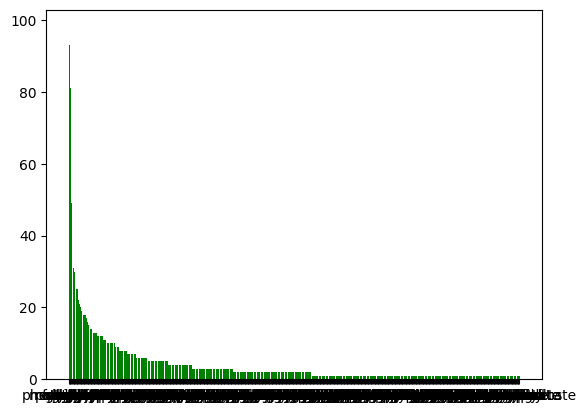

In [46]:
# create a histogram

import matplotlib.pyplot as plt
import numpy as np

plt.bar(sorted_occurences.keys(), sorted_occurences.values(), color='g')
plt.show()